In [2]:
import pandas as pd

In [5]:
df = pd.read_excel("../../data/update_raw/major-industry-total-factor-productivity-klems.xlsx", sheet_name="MachineReadable")

In [22]:
# Extract the needed measures


In [23]:
hw

,NAICS,Industry,Basis,Measure,Units,Year,Value
5,11,"Agriculture, forestry, fishing, and hunting",All workers,Hours worked,Index (2012=100),1987,121.681
41,11,"Agriculture, forestry, fishing, and hunting",All workers,Hours worked,% Change from previous year,1987,N.A.
72,11,"Agriculture, forestry, fishing, and hunting",All workers,Hours worked,Millions of hours,1987,6266.716
73,11,"Agriculture, forestry, fishing, and hunting",All workers,Sectoral output,Billions of current dollars,1987,149.014
91,111-112,Crop & animal production (Farms),All workers,Hours worked,Index (2012=100),1987,129.192
...,...,...,...,...,...,...,...
243711,722,Food services and drinking places,All workers,Sectoral output,Billions of current dollars,2021,847.324
243729,81,"Other services, except government",All workers,Hours worked,Index (2012=100),2021,101.526
243765,81,"Other services, except government",All workers,Hours worked,% Change from previous year,2021,9.4
243796,81,"Other services, except government",All workers,Hours worked,Millions of hours,2021,6994.721


In [24]:
short_names = ['mining', 'trans', 'const', 'dur', 'nondur',
                'trade', 'info', 'fin','profserv', 'edhealth',
                'accom', 'other', 'gov']
sector_names = ['Mining', 'Transportation and Utilities', 'Construction',
                'Durable goods', 'Nondurable good', 'Wholesale and Retail trade',
                'Information', 'Financial Activities', 'Professional and business services',
                'Education and Health Services', 'Leisure  and Hospitality',
                'Other services, except government','Government']
sector_codes = ['21', ['22', '48TW'] ,'23', '33DG', ['31ND','11'], ['42', '44RT'],
                       '51', ['52', '53'], ['54','55','56'],['61','62'], ['71','72'],
                       '81','G']

In [25]:
# Create sector short name mappings 
sectors = pd.DataFrame({"short_names": short_names, "NAICS": sector_codes})
sectors = sectors.explode(column='NAICS')
replace_dict = {'48-49': '48TW', '44,45':'44RT', 'DM': '33DG', 'ND': '31ND'}

In [41]:
df.head()

,NAICS,Industry,Basis,Measure,Units,Year,Value
0,11,"Agriculture, forestry, fishing, and hunting",All workers,Total factor productivity,Index (2012=100),1987,76.062
1,11,"Agriculture, forestry, fishing, and hunting",All workers,Real sectoral output,Index (2012=100),1987,76.163
2,11,"Agriculture, forestry, fishing, and hunting",All workers,Combined inputs,Index (2012=100),1987,100.132
3,11,"Agriculture, forestry, fishing, and hunting",All workers,Capital input,Index (2012=100),1987,100.65
4,11,"Agriculture, forestry, fishing, and hunting",All workers,Labor input,Index (2012=100),1987,112.34


In [58]:
hw = df[((df['Measure'] == 'Hours worked') & (df['Units'] == 'Index (2012=100)')) | (df['Measure'] ==  'Sectoral output')]
hw = hw.replace({'NAICS': replace_dict})
hw = pd.merge(hw, sectors,
              on='NAICS', how='inner')[['NAICS', 'short_names', 'Year', 'Measure', 'Value']]
hw = hw.pivot(index=['NAICS', 'short_names', 'Year'],
              columns='Measure', values='Value').reset_index()
hw

Measure,NAICS,short_names,Year,Hours worked,Sectoral output
0,11,nondur,1987,121.681,149.014
1,11,nondur,1988,121.7,154.06
2,11,nondur,1989,122.297,166.979
3,11,nondur,1990,115.631,172.96
4,11,nondur,1991,115.276,167.837
...,...,...,...,...,...
695,81,other,2017,106.128,558.562
696,81,other,2018,109.788,581.908
697,81,other,2019,108.957,603.609
698,81,other,2020,92.823,575.856


In [59]:
# Compute output share to weight the factor shares by
hw.loc[:, 'Output share'] = hw['Sectoral output'] \
/ hw.groupby(['short_names', 'Year'])['Sectoral output'].transform('sum')

In [60]:
# Compute output-weighted factor shares
hw.loc[:, 'Hours worked'] = hw['Hours worked'] * hw['Output share']
hw = hw.groupby(['short_names', 'Year'])\
.aggregate({'Hours worked': 'sum'}).reset_index()

In [61]:
hw[hw['short_names'] == 'accom']

Measure,short_names,Year,Hours worked
0,accom,1987,70.835657
1,accom,1988,73.040892
2,accom,1989,75.703012
3,accom,1990,75.050157
4,accom,1991,74.180641
5,accom,1992,74.987123
6,accom,1993,78.546255
7,accom,1994,81.751758
8,accom,1995,83.510190
9,accom,1996,85.965334


<AxesSubplot:xlabel='Year'>

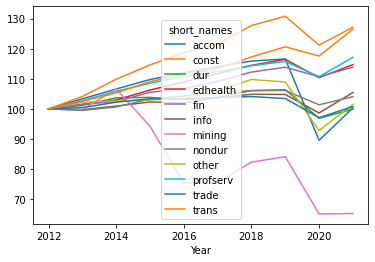

In [66]:
hw[hw['Year'] >= 2012].pivot(columns=['short_names'], values='Hours worked', index='Year').plot()

In [10]:
shares_2021.to_csv("../data/clean/energy_capita_shares.csv", index=False)